In [1]:
# Import the necessary packages and libraries 
import scipy
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import numpy.matlib
import pandas 
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
import tensorflow
from tensorflow import keras 
import os
from sklearn.neighbors import DistanceMetric

In [2]:
# Sets the precision of the data in the Pandas Dataframes 

pandas.set_option("precision", 10)

In [3]:
# Removes any Tensorflow warnings 

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
# Import the MatLab data #

matlabData = sio.loadmat(file_name='./data/s2_sl2p_uniform_10_replicates_sobol_prosail_inout.mat', variable_names=['Input', 'Output'])

In [5]:
# Extract the input and output data 

bands = pandas.DataFrame(data=matlabData['Input']['Rho_Toc'][0][0])
angles = pandas.DataFrame(data=matlabData['Input']['Angles'][0][0])
LAI = pandas.Series(data=matlabData['Output']['LAI'][0][0].flatten())
FAPAR = pandas.Series(data=matlabData['Output']['FAPAR'][0][0].flatten())
FCOVER = pandas.Series(data=matlabData['Output']['FCOVER'][0][0].flatten())

In [6]:
# Standardize the calibration data 

cal_data = pandas.concat([bands, angles, LAI, FAPAR, FCOVER], axis=1, join='outer')

cal_data.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER']

cal_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER
0,0.1312746755,0.0743505601,0.1729546392,0.2952160738,0.3209243927,0.3303722287,0.1873586099,0.1113007554,0.9638065534,0.5275411500,-0.5752876765,1,0.4391203617,0.4803244610
1,0.1019407701,0.0868185076,0.1599851769,0.3680334831,0.4389734403,0.4759755142,0.3043390179,0.1996883219,0.9995852344,0.5284670738,-0.4777431279,1,0.5296906764,0.5338211214
2,0.0577228876,0.0543735427,0.0726863963,0.1146353863,0.1262129829,0.1300015294,0.1048168652,0.0853760008,0.9807097061,0.6843199822,0.6909005295,1,0.2406051357,0.2324486617
3,0.0608335819,0.0423475494,0.0917885392,0.1738484853,0.1980468499,0.2153382831,0.1396374825,0.0906137034,0.9865515976,0.7869673865,0.8590635747,1,0.3515168619,0.3732491055
4,0.0789422177,0.1359804109,0.1677317262,0.2554469658,0.2962514793,0.3108466204,0.3167107908,0.2088934617,0.9999190888,0.8237423248,-0.9085753290,1,0.2890892994,0.2565897729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,0.0642385315,0.0276301255,0.0866383370,0.3106952678,0.4255780128,0.4466691326,0.1173674161,0.0414608341,0.9641458993,0.8501574022,-0.9266152189,10,0.9454688738,0.9530549586
122876,0.0913131658,0.0504649365,0.1222839075,0.3081750760,0.4047671458,0.4293059492,0.1725548796,0.1005631041,0.9616583754,0.8710934328,0.9265827175,10,0.8085248415,0.8034524935
122877,0.0621419307,0.0380236717,0.0921177459,0.2614424931,0.3577263614,0.3626203975,0.1294881968,0.0624406803,0.9757927762,0.8637999983,-0.9813994186,10,0.8185069725,0.8122050332
122878,0.0514800307,0.0288523379,0.0690024543,0.4158467721,0.6343113015,0.6354447032,0.1810943898,0.0474550174,0.9606931097,0.8268533675,-0.8694016324,10,0.9810850825,0.9992241257


In [7]:
# Standardize the calibration data 

cal_data_scaled = pandas.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(cal_data))

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER']

cal_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598
122876,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081
122877,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201
122878,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430


In [8]:
# Create subset id's 

rep = 10

subsets = numpy.arange(0, int(cal_data_scaled.shape[0]/10))

subset_ids = numpy.matlib.repmat(subsets, 1, rep)

cal_data_scaled['subset_id'] = subset_ids[0]

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'subset_id']

cal_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283
122876,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284
122877,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285
122878,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286


In [9]:
# Sample data to create reference database 
# Select samples that have an LAI less than or equal to four

ref_data = cal_data_scaled[cal_data['LAI'] <= 4].sample(n=100, ignore_index=False)

ref_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id
37320,-0.9153066558,-0.0880082020,-0.9306076706,-0.1921468784,0.1842380804,0.0842833983,-0.6428385749,-0.5086119286,-0.4092192226,0.5994675481,1.1675439014,-0.5222329679,0.3929794248,0.3291646737,456
21563,0.0657367874,2.4857143964,0.2261741746,-1.3136864820,-1.4489633018,-1.3809574844,0.5905377700,1.6486384969,-1.8358649987,0.0318252722,-0.9547758464,-1.2185435917,-1.8438099469,-2.0424173123,9275
11933,-0.7636760727,0.7744372938,-0.7448149814,-1.8602089925,-2.0061551357,-2.0287105267,-0.9554876759,0.0652015029,-1.0016842904,1.1151574123,1.2789682215,-1.5666989036,-2.4334659553,-2.3723367771,11933
5014,0.2030592961,1.1487408971,0.1362358645,-0.6676588237,-0.9481385552,-0.9691709145,0.4631384408,1.5972896212,-0.0300123450,1.0176423514,1.2788789596,-1.5666989036,-1.5621969916,-1.5363127937,5014
392,0.1442638993,2.0020730576,-0.0429649958,-1.1007972754,-1.2727016046,-1.3102834099,-0.0048895785,0.9035200021,1.3368715908,0.7371518612,-1.1077728717,-1.5666989036,-1.7776973202,-1.8252077123,392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,0.4706217689,2.6280535633,0.2658536847,-1.3534912690,-1.5773024720,-1.6004245950,0.4985541114,1.9344058383,0.2971292515,-0.0234162316,0.8727158077,-1.5666989036,-2.3784099956,-2.4568274346,2131
429,-0.1153348709,1.4510943110,0.2795095923,-0.4557858907,-0.6123825343,-0.4798121605,2.5527284746,3.1593930139,0.3612267292,-0.6257576094,-0.6815172894,-1.5666989036,-1.6314240574,-1.6124618499,429
41798,-0.6376286580,-0.1645312104,-0.7475600190,-1.0776293890,-1.0848612311,-1.0652255508,-0.6746218044,-0.3289692507,1.2262629736,1.2613505066,1.2357096888,-0.5222329679,-0.4499843593,-0.5162888891,4934
21936,0.5376090546,-0.1093036460,0.4352625509,-0.6141743780,-1.0174375104,-1.0587228968,-0.4807397763,-0.3641474708,0.3904127882,0.1185042139,-0.9329986014,-1.2185435917,-1.0477870030,-0.8381782349,9648


In [10]:
# List of indices to remove from the calibration database 

index_list = ref_data.index.values

In [11]:
# Resets the indices in the reference data so that they start from zero

ref_data = ref_data.reset_index(drop=True)

In [12]:
# Removes the indices from calibration database that are in the reference database 

cal_data_scaled = cal_data_scaled.drop(index_list)

In [13]:
# Resets the indices in the calibration data so that they start from zero

cal_data_scaled = cal_data_scaled.reset_index(drop=True)

In [14]:
# Creates the training and validation sets from the calibration data

features_training, features_valid = sklearn.model_selection.train_test_split(cal_data_scaled, test_size=0.3, train_size=0.7, random_state=None, shuffle=True, stratify=None)

In [15]:
# Resets the indices in the training data so that they start from zero

features_training = features_training.reset_index(drop=True)

In [16]:
# Resets the indices in the validation data so that they start from zero

features_valid = features_valid.reset_index(drop=True)

In [17]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for training

LAI_feature_training = features_training['LAI']
FAPAR_feature_training = features_training['FAPAR']
FCOVER_feature_training = features_training['FCOVER']

In [18]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for validation

LAI_feature_valid = features_valid['LAI']
FAPAR_feature_valid = features_valid['FAPAR']
FCOVER_feature_valid = features_valid['FCOVER']

In [19]:
# Removes that isn't needed for training and validation 

features_training = features_training.drop(['LAI', 'FAPAR', 'FCOVER','subset_id'], axis=1)
features_valid = features_valid.drop(['LAI', 'FAPAR', 'FCOVER','subset_id'], axis=1)

In [20]:
# Creates a model for LAI, FAPAR, and FCOVER using LARs regression 

LAI_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=4)
LAI_feature_model = LAI_feature_model.fit(features_training, LAI_feature_training)

FAPAR_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=4)
FAPAR_feature_model = FAPAR_feature_model.fit(features_training, FAPAR_feature_training)

FCOVER_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=4)
FCOVER_feature_model = FCOVER_feature_model.fit(features_training, FCOVER_feature_training)

In [21]:
# Makes predictions on the validation data using the LARS models

LAI_feature_predicted = pandas.Series(LAI_feature_model.predict(features_valid))
FAPAR_feature_predicted = pandas.Series(FAPAR_feature_model.predict(features_valid))
FCOVER_feature_predicted = pandas.Series(FCOVER_feature_model.predict(features_valid))

In [22]:
# Extracts the features from the LARS Model

LAI_features = numpy.nonzero(LAI_feature_model.coef_)[0]
FAPAR_features = numpy.nonzero(FAPAR_feature_model.coef_)[0]
FCOVER_features = numpy.nonzero(FCOVER_feature_model.coef_)[0]

LAI_features = features_valid.columns[LAI_features]
FAPAR_features = features_valid.columns[FAPAR_features]
FCOVER_features = features_valid.columns[FCOVER_features]

In [23]:
# Creates arrays containing the calibration and reference data 

ref_array = numpy.array(ref_data[LAI_features])

cal_array = numpy.array(cal_data_scaled[LAI_features])

In [24]:
# Calls function from sci-kit learn for calculating the euclidean distance 

dist = DistanceMetric.get_metric('euclidean')

In [25]:
# Calculates the probability for each sample in the calibration data

probs = numpy.exp(-numpy.amin(dist.pairwise(cal_array,ref_array),1))

In [26]:
# Initialize the probability column in the calibration database #

cal_data_scaled['prob'] = probs 

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'subset_id', 'prob']

In [27]:
# Function to normalize the probabilities 

def normalize(data):
    norm_prob = numpy.array(data['prob'])/sum(data['prob'])
    data['prob'] = norm_prob 
    return data

In [28]:
normalize(cal_data_scaled)

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id,prob
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0,0.0000096067
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1,0.0000059708
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2,0.0000103413
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3,0.0000109410
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4,0.0000041773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122775,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283,0.0000088076
122776,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284,0.0000084513
122777,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285,0.0000086017
122778,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286,0.0000094602


In [29]:
# Initialize the probability column in the calibration database #

cal_data_scaled.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'subset_id', 'prob']

In [30]:
# Assign max probability in each subset to every member of that subset 

cal_data_scaled['prob'] = cal_data_scaled.groupby('subset_id')['prob'].transform('max')

In [31]:
normalize(cal_data_scaled)

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id,prob
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0,0.0000077971
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1,0.0000076154
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2,0.0000084269
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3,0.0000088800
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4,0.0000083289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122775,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283,0.0000075731
122776,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284,0.0000075496
122777,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285,0.0000079397
122778,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286,0.0000086376


In [32]:
# Find median probability 

median_prob = numpy.median(cal_data_scaled['prob'])

print(median_prob)

8.243042127525217e-06


In [33]:
# Set weight that are below the median to zero 

cal_data_scaled['prob'] = cal_data_scaled['prob'].where(cal_data_scaled['prob'] > median_prob, 0.0)

In [34]:
cal_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,subset_id,prob
0,1.1600887942,1.1894959571,1.1005309674,-0.7574953553,-1.2136760897,-1.2551477212,-0.5123998591,0.0482701907,-1.5351947333,-1.2590753240,-0.7795178075,-1.5666989036,-1.8949148320,-1.6291084301,0,0.0000000000
1,0.3768666595,1.6844505369,0.8279254564,-0.1275628723,-0.4502226101,-0.3312429285,0.9573384489,1.5671047307,1.3154921199,-1.2529678973,-0.6517039023,-1.5666989036,-1.4265332698,-1.3709908078,1,0.0000000000
2,-0.8037611472,0.3964451147,-1.0070101806,-2.3196717910,-2.4729247349,-2.5265712936,-1.5494518415,-0.3972156885,-0.1884263875,-0.2249564670,0.8795852552,-1.5666989036,-2.9215301414,-2.8250917213,2,0.0000084269
3,-0.7207048794,-0.0809646948,-0.6055016769,-1.8074281556,-2.0083566857,-1.9850791466,-1.1119666599,-0.3072120391,0.2770296632,0.4521095310,1.0999315055,-1.5666989036,-2.3479536034,-2.1457394865,3,0.0000088800
4,-0.2372000684,3.6360876602,0.9907504054,-1.1015319421,-1.3732421509,-1.3790446724,1.1127770292,1.7252840412,1.3420921626,0.6946783564,-1.2162290029,-1.5666989036,-2.6707957989,-2.7086125584,4,0.0000083289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122775,-0.6297919312,-0.6652193518,-0.7137539294,-0.6235871705,-0.5368542767,-0.5172023756,-1.3917671005,-1.1518452670,-1.5081571622,0.8689131637,-1.2398669079,1.5666989036,0.7236507314,0.6517829598,12283,0.0000000000
122776,0.0931071377,0.2412806393,0.0354813671,-0.6453889716,-0.6714434932,-0.6273779690,-0.6983934776,-0.1362434958,-1.7063520463,1.0070079804,1.1884027264,1.5666989036,0.0154489326,-0.0700384081,12284,0.0000000000
122777,-0.6857716627,-0.2526146846,-0.5985820716,-1.0496655348,-0.9756683152,-1.0505215854,-1.2394819780,-0.7913317214,-0.5801855863,0.9589002217,-1.3116513655,1.5666989036,0.0670712121,-0.0278080201,12285,0.0000000000
122778,-0.9704468859,-0.6166997679,-1.0844430668,0.2860627172,0.8130774569,0.6806459689,-0.5911033299,-1.0488424022,-1.7832601421,0.7151989067,-1.1648991929,1.5666989036,0.9078388454,0.8745459430,12286,0.0000086376


In [35]:
# Creates the training and validation sets from the calibration data

training_data, valid_data = sklearn.model_selection.train_test_split(cal_data_scaled, test_size=0.3, train_size=0.7, random_state=None, shuffle=True, stratify=None)

In [36]:
# Resets the indices in the training data so that they start from zero

training_data = training_data.reset_index(drop=True)

In [37]:
# Resets the indices in the validation data so that they start from zero

valid_data = valid_data.reset_index(drop=True)

In [38]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for training

LAI_training = training_data['LAI']
FAPAR_training = training_data['FAPAR']
FCOVER_training = training_data['FCOVER']

In [39]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for validation

LAI_valid = valid_data['LAI']
FAPAR_valid = valid_data['FAPAR']
FCOVER_valid = valid_data['FCOVER']

In [40]:
# Extracts the probabilites for training and validation 

training_weights = numpy.array(training_data['prob'])
valid_weights = numpy.array(valid_data['prob'])

In [41]:
# Removes that isn't needed for training and validation 
# Explicitly subset the inputs
training_data = training_data.drop(['LAI', 'FAPAR', 'FCOVER','subset_id','prob'], axis=1)
valid_data = valid_data.drop(['LAI', 'FAPAR', 'FCOVER','subset_id','prob'], axis=1)

In [42]:
LAI_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
FAPAR_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
FCOVER_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [43]:
# Creation of the Neural Network models for LAI, FAPAR, and FCOVER 

LAI_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

LAI_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

FAPAR_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

FAPAR_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

FCOVER_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

FCOVER_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

In [44]:
# Runs NN Model for LAI

LAI_history = LAI_model.fit(x = numpy.array(training_data), y = numpy.array(LAI_training), 
                            sample_weight = training_weights,
                            epochs = 120,
                            validation_data = (numpy.array(valid_data), numpy.array(LAI_valid), valid_weights),
                            callbacks=[LAI_callback]
                           )

Train on 85946 samples, validate on 36834 samples
Epoch 1/120
85946/85946 [==============================] - 15s 178us/sample - loss: 1.6633e-06 - mse: 0.4045 - mae: 0.5085 - val_loss: 1.0646e-06 - val_mse: 0.2604 - val_mae: 0.4027
Epoch 2/120
85946/85946 [==============================] - 11s 125us/sample - loss: 9.7329e-07 - mse: 0.2344 - mae: 0.3780 - val_loss: 8.5597e-07 - val_mse: 0.2005 - val_mae: 0.3513
Epoch 3/120
85946/85946 [==============================] - 11s 128us/sample - loss: 7.8909e-07 - mse: 0.1832 - mae: 0.3346 - val_loss: 7.2826e-07 - val_mse: 0.1668 - val_mae: 0.3214
Epoch 4/120
85946/85946 [==============================] - 12s 138us/sample - loss: 6.8905e-07 - mse: 0.1589 - mae: 0.3094 - val_loss: 6.3533e-07 - val_mse: 0.1458 - val_mae: 0.2962
Epoch 5/120
85946/85946 [==============================] - 11s 126us/sample - loss: 6.2211e-07 - mse: 0.1427 - mae: 0.2925 - val_loss: 5.7542e-07 - val_mse: 0.1346 - val_mae: 0.2844
Epoch 6/120
85946/85946 [===============

In [45]:
# Runs NN Model for FAPAR

FAPAR_history = FAPAR_model.fit(x = numpy.array(training_data), y = numpy.array(FAPAR_training),
                                sample_weight = training_weights,
                                epochs = 20, 
                                validation_data = (numpy.array(valid_data), numpy.array(FAPAR_valid), valid_weights),
                                callbacks=[FAPAR_callback]
                               )

Train on 85946 samples, validate on 36834 samples
Epoch 1/20
85946/85946 [==============================] - 13s 156us/sample - loss: 5.5331e-07 - mse: 0.1334 - mae: 0.2414 - val_loss: 1.9713e-07 - val_mse: 0.0488 - val_mae: 0.1671
Epoch 2/20
85946/85946 [==============================] - 11s 123us/sample - loss: 1.6997e-07 - mse: 0.0404 - mae: 0.1508 - val_loss: 1.5152e-07 - val_mse: 0.0357 - val_mae: 0.1398
Epoch 3/20
85946/85946 [==============================] - 11s 123us/sample - loss: 1.3388e-07 - mse: 0.0313 - mae: 0.1308 - val_loss: 1.1877e-07 - val_mse: 0.0278 - val_mae: 0.1227
Epoch 4/20
85946/85946 [==============================] - 11s 123us/sample - loss: 1.1266e-07 - mse: 0.0264 - mae: 0.1185 - val_loss: 1.0494e-07 - val_mse: 0.0248 - val_mae: 0.1144
Epoch 5/20
85946/85946 [==============================] - 11s 123us/sample - loss: 1.0058e-07 - mse: 0.0237 - mae: 0.1114 - val_loss: 9.7066e-08 - val_mse: 0.0228 - val_mae: 0.1088
Epoch 6/20
85946/85946 [=====================

In [46]:
# Runs NN Model for FCOVER

FCOVER_history = FCOVER_model.fit(x = numpy.array(training_data), y = numpy.array(FCOVER_training),
                                  sample_weight = training_weights,
                                  epochs = 20, 
                                  validation_data = (numpy.array(valid_data), numpy.array(FCOVER_valid), valid_weights),
                                  callbacks=[FCOVER_callback]
                                 )

Train on 85946 samples, validate on 36834 samples
Epoch 1/20
85946/85946 [==============================] - 13s 157us/sample - loss: 3.8317e-07 - mse: 0.0906 - mae: 0.1932 - val_loss: 1.4560e-07 - val_mse: 0.0369 - val_mae: 0.1418
Epoch 2/20
85946/85946 [==============================] - 11s 125us/sample - loss: 1.2503e-07 - mse: 0.0307 - mae: 0.1303 - val_loss: 1.0872e-07 - val_mse: 0.0262 - val_mae: 0.1220
Epoch 3/20
85946/85946 [==============================] - 11s 125us/sample - loss: 1.0277e-07 - mse: 0.0245 - mae: 0.1176 - val_loss: 9.3189e-08 - val_mse: 0.0224 - val_mae: 0.1131
Epoch 4/20
85946/85946 [==============================] - 11s 125us/sample - loss: 9.2765e-08 - mse: 0.0219 - mae: 0.1112 - val_loss: 8.6603e-08 - val_mse: 0.0208 - val_mae: 0.1084
Epoch 5/20
85946/85946 [==============================] - 11s 126us/sample - loss: 8.6683e-08 - mse: 0.0203 - mae: 0.1066 - val_loss: 8.0674e-08 - val_mse: 0.0192 - val_mae: 0.1035
Epoch 6/20
85946/85946 [=====================

In [47]:
# These are all plots for the RMSE of the NN as training was run

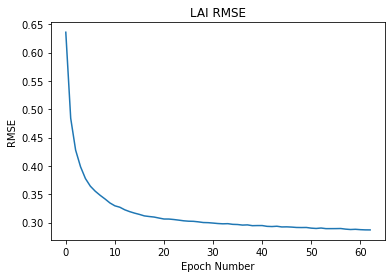

In [48]:
LAI_rmse = plt.plot(numpy.sqrt(LAI_history.history['mse']))
plt.xlabel("Epoch Number")
plt.ylabel("RMSE")
plt.title("LAI RMSE")
plt.show()

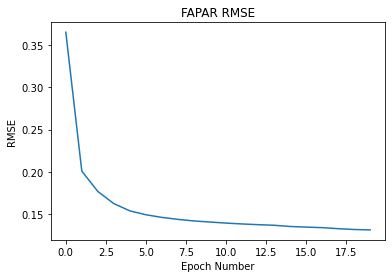

In [49]:
FAPAR_rmse = plt.plot(numpy.sqrt(FAPAR_history.history['mse']))
plt.xlabel("Epoch Number")
plt.ylabel("RMSE")
plt.title("FAPAR RMSE")
plt.show()

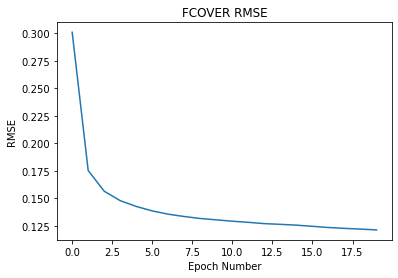

In [50]:
FCOVER_rmse = plt.plot(numpy.sqrt(FCOVER_history.history['mse']))
plt.xlabel("Epoch Number")
plt.ylabel("RMSE")
plt.title("FCOVER RMSE")
plt.show()

In [51]:
# Makes predictions on the validation data using the 

LAI_predictions = pandas.Series(LAI_model.predict(numpy.array(valid_data)).flatten())
FAPAR_predictions = pandas.Series(FAPAR_model.predict(numpy.array(valid_data)).flatten())
FCOVER_predictions = pandas.Series(FCOVER_model.predict(numpy.array(valid_data)).flatten())

In [52]:
# Creates a model for LAI, FAPAR, and FCOVER using LARs regression 

LAImodel = sklearn.linear_model.Lars(n_nonzero_coefs=4)
LAImodel = LAImodel.fit(training_data, LAI_training)

FAPARmodel = sklearn.linear_model.Lars(n_nonzero_coefs=4)
FAPARmodel = FAPARmodel.fit(training_data, FAPAR_training)

FCOVERmodel = sklearn.linear_model.Lars(n_nonzero_coefs=4)
FCOVERmodel = FCOVERmodel.fit(training_data, FCOVER_training)

In [53]:
# Makes predictions on the validation data using the LARS models

LAI_predicted = pandas.Series(LAImodel.predict(valid_data))
FAPAR_predicted = pandas.Series(FAPARmodel.predict(valid_data))
FCOVER_predicted = pandas.Series(FCOVERmodel.predict(valid_data))

In [54]:
# Function that creates the density plots 

def plotting_function(var, input_var, resp_var, title, xlabel, ylabel, alg, ax=None):
    ax = ax
    input_var = input_var*cal_data[var].std() + cal_data[var].mean()
    resp_var = resp_var*cal_data[var].std() + cal_data[var].mean()
    xy = numpy.vstack([input_var, resp_var])
    z = scipy.stats.gaussian_kde(xy)(xy)
    idx = z.argsort()
    x = input_var[idx]
    y = resp_var[idx]
    z = z[idx]
    rmse = sklearn.metrics.mean_squared_error(x, y, squared=False)
    r_sqr = sklearn.metrics.r2_score(x, y)
    ax.scatter(x, y, c = z)
    plt.colorbar(mappable=ax.scatter(x, y, c = z), ax=ax)
    ax.set_title(title + '-' + alg + ' - RMSE: {}'.format(rmse) + ' - $R^2$: {}'.format(r_sqr))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [55]:
def lai_less_four(var, input_var, resp_var, title, xlabel, ylabel, alg, ax=None):
    ax=ax
    input_var = input_var*cal_data[var].std() + cal_data[var].mean()
    resp_var = resp_var*cal_data[var].std() + cal_data[var].mean()
    indices = numpy.where(numpy.array(resp_var) < 4)[0]
    input_var = input_var[indices]
    resp_var = resp_var[indices]
    xy = numpy.vstack([input_var, resp_var])
    z = scipy.stats.gaussian_kde(xy)(xy)
    x = input_var
    y = resp_var
    rmse = sklearn.metrics.mean_squared_error(x, y, squared=False)
    r_sqr = sklearn.metrics.r2_score(x, y)
    ax.scatter(x, y, c = z)
    plt.colorbar(mappable=ax.scatter(x, y, c = z), ax=ax)
    ax.set_title(title + '-' + alg + ' - RMSE: {}'.format(rmse) + ' - $R^2$: {}'.format(r_sqr))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

Text(0.5, 0.98, 'Reference LAI Less than Four - LARS')

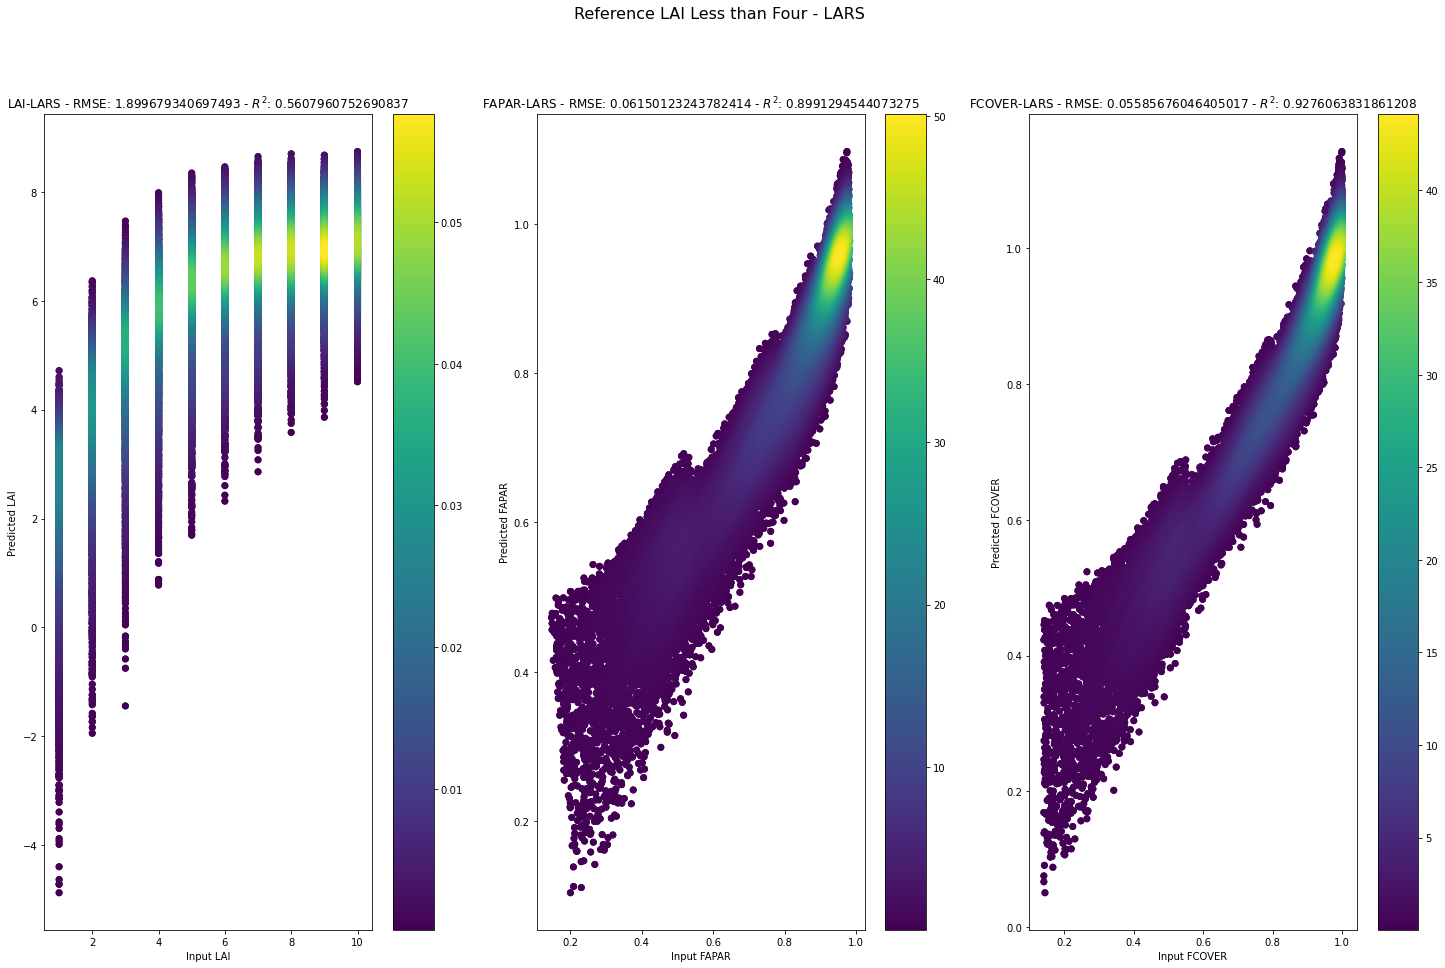

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(25,15))

plotting_function('LAI',LAI_valid, LAI_predicted, 'LAI','Input LAI','Predicted LAI','LARS', ax1)
  
plotting_function('FAPAR',FAPAR_valid, FAPAR_predicted, 'FAPAR','Input FAPAR','Predicted FAPAR','LARS', ax2)

plotting_function('FCOVER',FCOVER_valid, FCOVER_predicted, 'FCOVER','Input FCOVER','Predicted FCOVER','LARS', ax3)

fig.suptitle('Reference LAI Less than Four - LARS', fontsize=16)

Text(0.5, 0.98, 'Reference LAI Less than Four - Only LAI Values Less than Four - LARS')

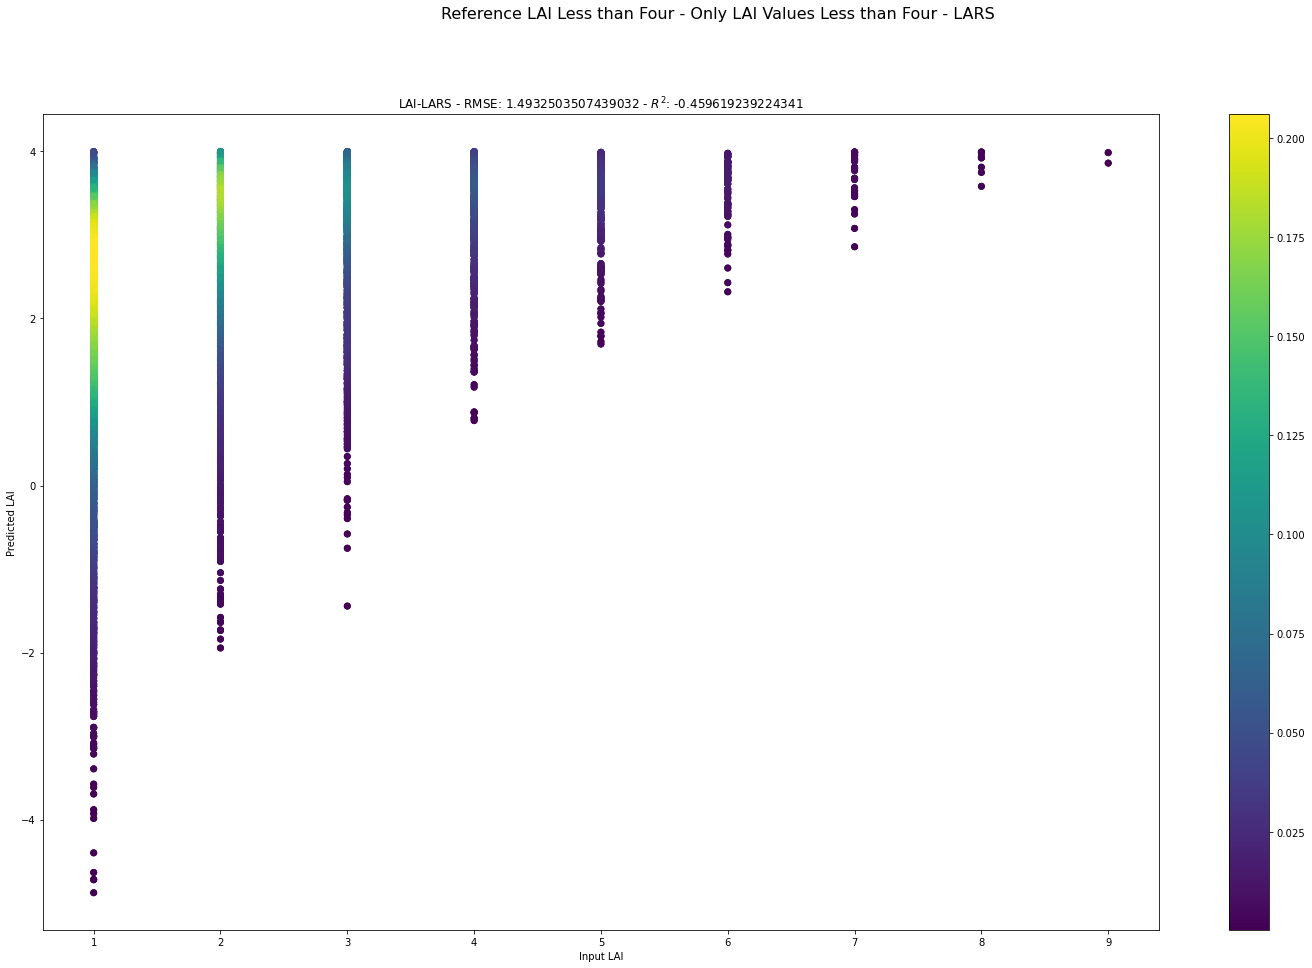

In [57]:
fig, (ax4) = plt.subplots(1,1,figsize=(25,15))

lai_less_four('LAI',LAI_valid, LAI_predicted, 'LAI','Input LAI','Predicted LAI','LARS', ax4)

fig.suptitle('Reference LAI Less than Four - Only LAI Values Less than Four - LARS', fontsize=16)

Text(0.5, 0.98, 'Reference LAI Less than Four - Neural Network - with weights')

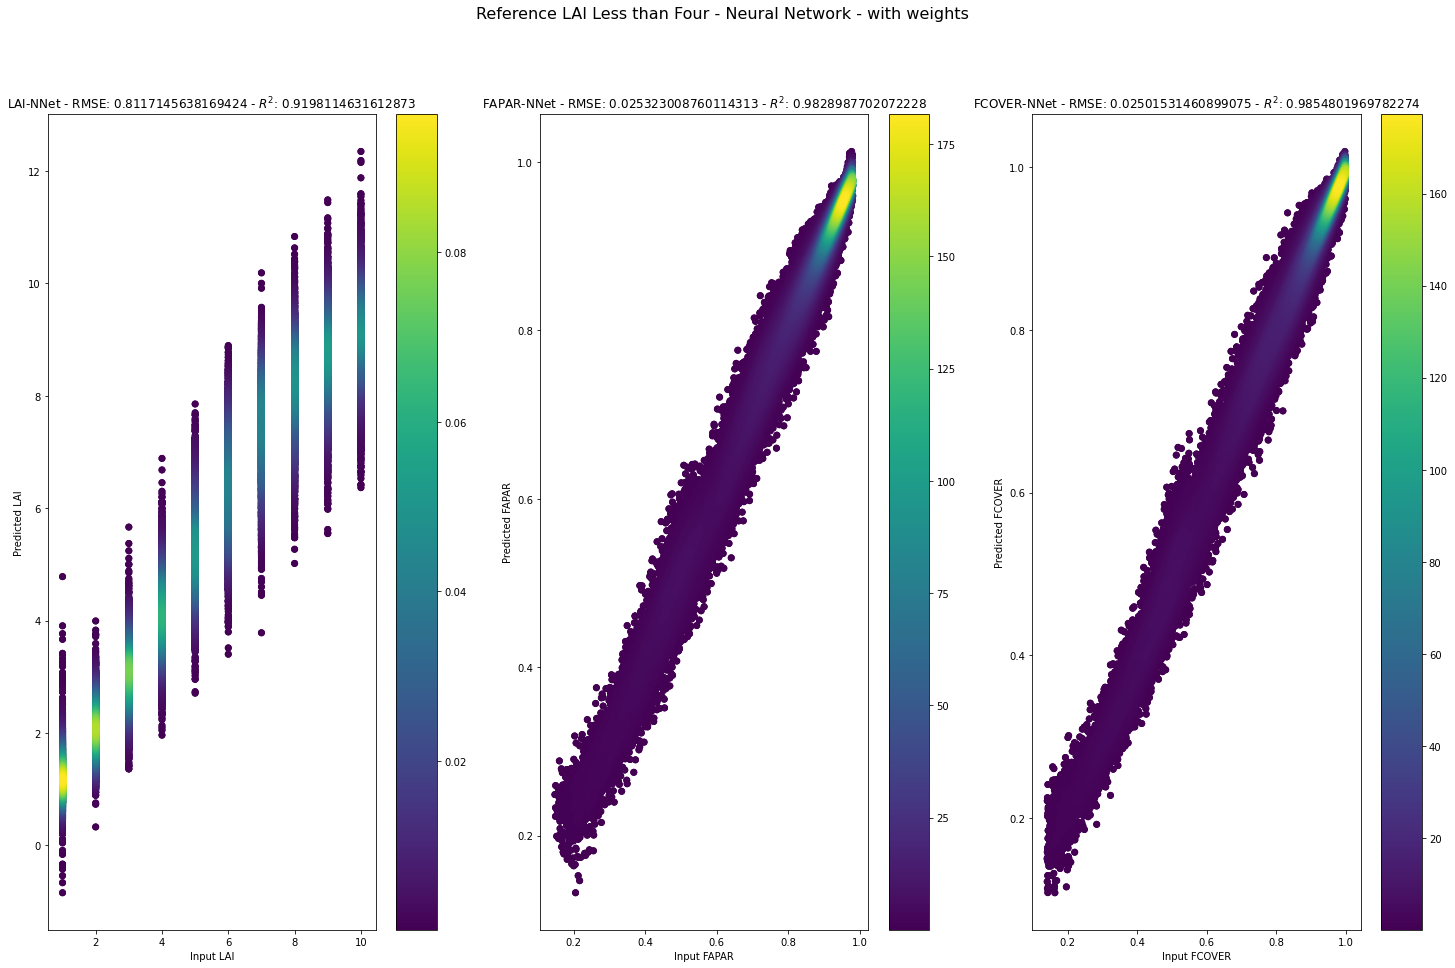

In [58]:
fig, (ax5, ax6, ax7) = plt.subplots(1,3,figsize=(25,15))

plotting_function('LAI', LAI_valid, LAI_predictions, 'LAI','Input LAI','Predicted LAI','NNet',ax5)
plotting_function('FAPAR', FAPAR_valid, FAPAR_predictions, 'FAPAR','Input FAPAR','Predicted FAPAR','NNet',ax6)
plotting_function('FCOVER', FCOVER_valid, FCOVER_predictions, 'FCOVER','Input FCOVER','Predicted FCOVER','NNet',ax7)

fig.suptitle('Reference LAI Less than Four - Neural Network - with weights', fontsize=16)

Text(0.5, 0.98, 'Reference LAI Less than Four - Only Values of LAI Less than Four - Neural Network - with weights')

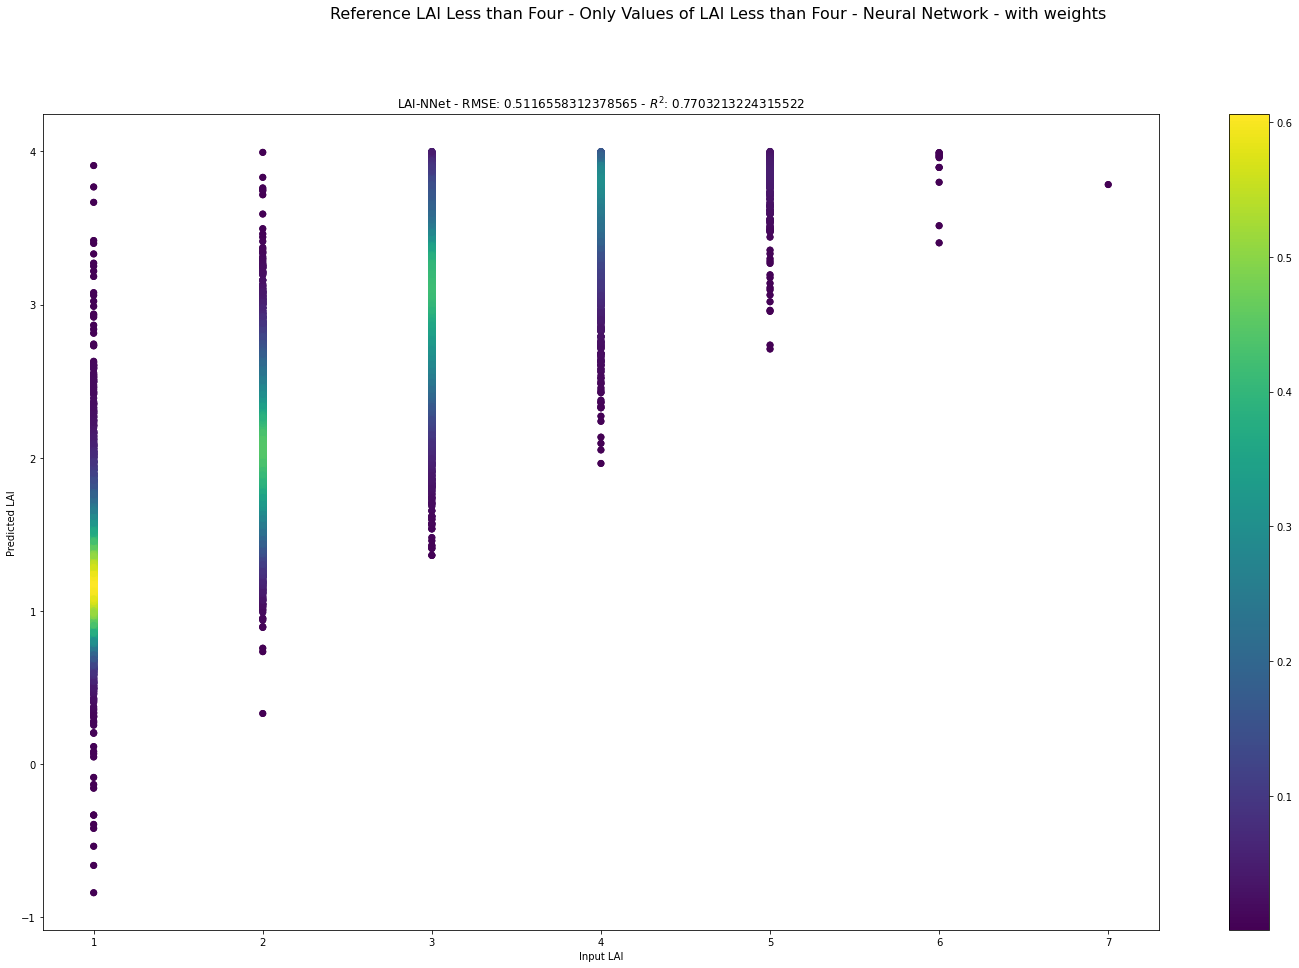

In [59]:
fig, (ax8) = plt.subplots(1,1,figsize=(25,15))

lai_less_four('LAI', LAI_valid, LAI_predictions, 'LAI','Input LAI','Predicted LAI','NNet',ax8)

fig.suptitle('Reference LAI Less than Four - Only Values of LAI Less than Four - Neural Network - with weights', fontsize=16)

In [60]:
# Creation of the Neural Network models for LAI, FAPAR, and FCOVER 

LAI_model_no_weights = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

LAI_model_no_weights.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

FAPAR_model_no_weights = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

FAPAR_model_no_weights.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

FCOVER_model_no_weights = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

FCOVER_model_no_weights.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

In [61]:
# Runs NN Model for LAI

LAI_history_no_weights = LAI_model_no_weights.fit(x = numpy.array(training_data), y = numpy.array(LAI_training), 
                            epochs = 120,
                            validation_data = (numpy.array(valid_data), numpy.array(LAI_valid)) 
                           )

Train on 85946 samples, validate on 36834 samples
Epoch 1/120
85946/85946 [==============================] - 15s 173us/sample - loss: 0.3230 - mse: 0.3230 - mae: 0.4536 - val_loss: 0.1926 - val_mse: 0.1926 - val_mae: 0.3457
Epoch 2/120
85946/85946 [==============================] - 11s 132us/sample - loss: 0.1625 - mse: 0.1625 - mae: 0.3140 - val_loss: 0.1408 - val_mse: 0.1408 - val_mae: 0.2920
Epoch 3/120
85946/85946 [==============================] - 13s 146us/sample - loss: 0.1335 - mse: 0.1335 - mae: 0.2833 - val_loss: 0.1259 - val_mse: 0.1259 - val_mae: 0.2764
Epoch 4/120
85946/85946 [==============================] - 12s 136us/sample - loss: 0.1221 - mse: 0.1221 - mae: 0.2693 - val_loss: 0.1185 - val_mse: 0.1185 - val_mae: 0.2674
Epoch 5/120
85946/85946 [==============================] - 12s 138us/sample - loss: 0.1151 - mse: 0.1151 - mae: 0.2613 - val_loss: 0.1103 - val_mse: 0.1103 - val_mae: 0.2562
Epoch 6/120
85946/85946 [==============================] - 12s 137us/sample - lo

In [62]:
# Runs NN Model for FAPAR

FAPAR_history_no_weights = FAPAR_model_no_weights.fit(x = numpy.array(training_data), y = numpy.array(FAPAR_training),
                                epochs = 20, 
                                validation_data = (numpy.array(valid_data), numpy.array(FAPAR_valid))
                               )

Train on 85946 samples, validate on 36834 samples
Epoch 1/20
85946/85946 [==============================] - 15s 174us/sample - loss: 0.0941 - mse: 0.0941 - mae: 0.1975 - val_loss: 0.0319 - val_mse: 0.0319 - val_mae: 0.1321
Epoch 2/20
85946/85946 [==============================] - 12s 138us/sample - loss: 0.0266 - mse: 0.0266 - mae: 0.1203 - val_loss: 0.0230 - val_mse: 0.0230 - val_mae: 0.1103
Epoch 3/20
85946/85946 [==============================] - 12s 139us/sample - loss: 0.0212 - mse: 0.0212 - mae: 0.1060 - val_loss: 0.0197 - val_mse: 0.0197 - val_mae: 0.1020
Epoch 4/20
85946/85946 [==============================] - 12s 141us/sample - loss: 0.0193 - mse: 0.0193 - mae: 0.1001 - val_loss: 0.0184 - val_mse: 0.0184 - val_mae: 0.0979
Epoch 5/20
85946/85946 [==============================] - 12s 138us/sample - loss: 0.0183 - mse: 0.0183 - mae: 0.0973 - val_loss: 0.0179 - val_mse: 0.0179 - val_mae: 0.0957
Epoch 6/20
85946/85946 [==============================] - 12s 140us/sample - loss: 0.

In [63]:
# Runs NN Model for FCOVER

FCOVER_history_no_weights = FCOVER_model_no_weights.fit(x = numpy.array(training_data), y = numpy.array(FCOVER_training),
                                  epochs = 20, 
                                  validation_data = (numpy.array(valid_data), numpy.array(FCOVER_valid))
                                 )

Train on 85946 samples, validate on 36834 samples
Epoch 1/20
85946/85946 [==============================] - 11s 131us/sample - loss: 0.0619 - mse: 0.0619 - mae: 0.1690 - val_loss: 0.0253 - val_mse: 0.0253 - val_mae: 0.1164
Epoch 2/20
85946/85946 [==============================] - 11s 129us/sample - loss: 0.0213 - mse: 0.0213 - mae: 0.1066 - val_loss: 0.0181 - val_mse: 0.0181 - val_mae: 0.0982
Epoch 3/20
85946/85946 [==============================] - 9s 104us/sample - loss: 0.0165 - mse: 0.0165 - mae: 0.0923 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0872
Epoch 4/20
85946/85946 [==============================] - 9s 105us/sample - loss: 0.0146 - mse: 0.0146 - mae: 0.0857 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0833
Epoch 5/20
85946/85946 [==============================] - 9s 109us/sample - loss: 0.0140 - mse: 0.0140 - mae: 0.0837 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0849
Epoch 6/20
85946/85946 [==============================] - 327s 4ms/sample - loss: 0.0134

In [64]:
# Makes predictions on the validation data

LAI_predictions_no_weights = pandas.Series(LAI_model_no_weights.predict(numpy.array(valid_data)).flatten())
FAPAR_predictions_no_weights = pandas.Series(FAPAR_model_no_weights.predict(numpy.array(valid_data)).flatten())
FCOVER_predictions_no_weights = pandas.Series(FCOVER_model_no_weights.predict(numpy.array(valid_data)).flatten())

Text(0.5, 0.98, 'Reference LAI Less than Four - Neural Network - without weights')

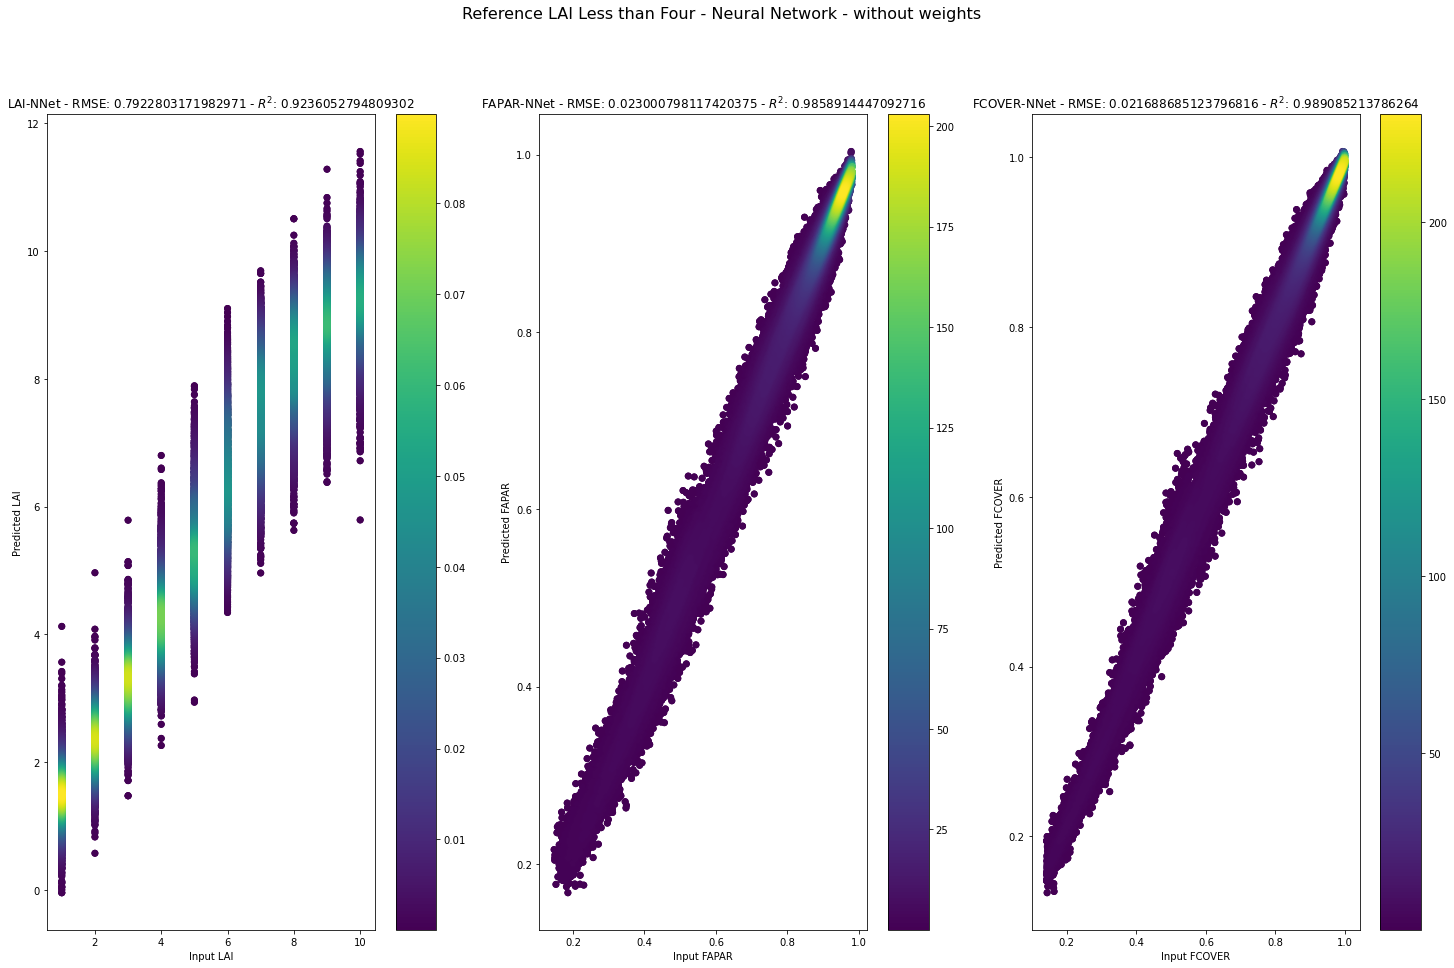

In [65]:
fig, (ax9, ax10, ax11) = plt.subplots(1,3,figsize=(25,15))

plotting_function('LAI', LAI_valid, LAI_predictions_no_weights, 'LAI','Input LAI','Predicted LAI','NNet',ax9)
plotting_function('FAPAR', FAPAR_valid, FAPAR_predictions_no_weights, 'FAPAR','Input FAPAR','Predicted FAPAR','NNet',ax10)
plotting_function('FCOVER', FCOVER_valid, FCOVER_predictions_no_weights, 'FCOVER','Input FCOVER','Predicted FCOVER','NNet',ax11)

fig.suptitle('Reference LAI Less than Four - Neural Network - without weights', fontsize=16)

Text(0.5, 0.98, 'Reference LAI Less than Four - Only LAI Values Less than Four - NNet - without weights')

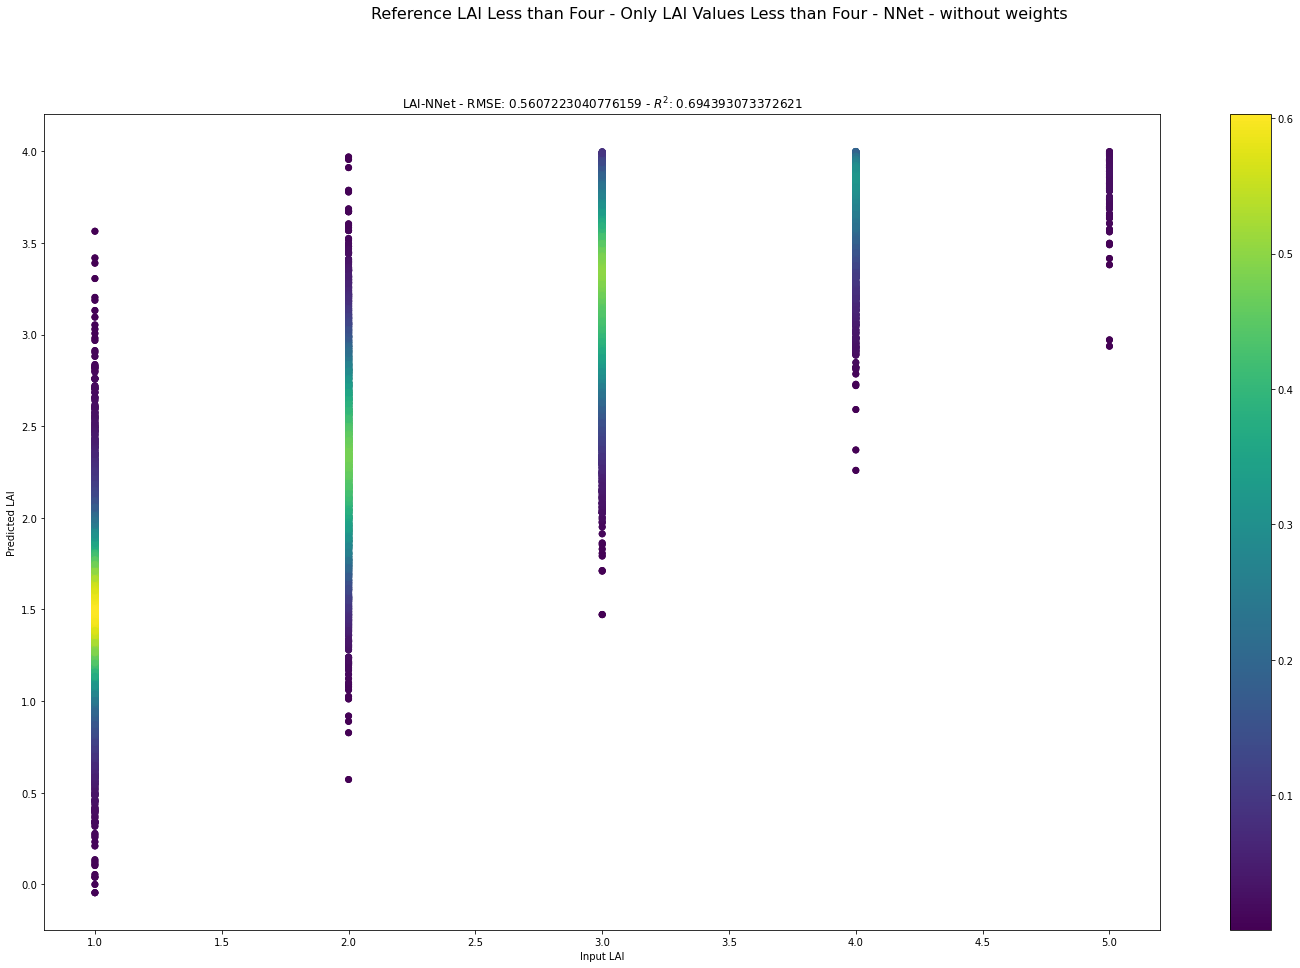

In [66]:
fig, (ax12) = plt.subplots(1,1,figsize=(25,15))

lai_less_four('LAI',LAI_valid, LAI_predictions_no_weights, 'LAI','Input LAI','Predicted LAI','NNet', ax12)

fig.suptitle('Reference LAI Less than Four - Only LAI Values Less than Four - NNet - without weights', fontsize=16)